Import Dependencies

In [0]:
import tensorflow as tf
import keras 
from keras import applications
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Add, Dense, Activation, Flatten, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.applications import VGG19, ResNet50, ResNet50V2, ResNet101V2, InceptionV3, DenseNet121
from keras import optimizers
from keras import Model
from keras import callbacks
import numpy as np 
import os 
import time 


Using TensorFlow backend.


In [0]:
print(tf.__version__)
print(keras.__version__)


2.2.0
2.3.1


In [0]:
#mount google drive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
#Load data
!git clone https://github.com/KiaAzar/CS168.git
test_data_dir = '/content/CS168/samples/test'
train_data_dir = '/content/CS168/samples/train'

fatal: destination path 'CS168' already exists and is not an empty directory.


Create Data for binary classification

In [0]:
#Create data Generator and set data augmentation
datagen = ImageDataGenerator(
         # randomly rotate images in the range (degrees, 0 to 180)
        rotation_range=15, 
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        # randomly flip images
        horizontal_flip=True,  
         # randomly flip images
        vertical_flip=True, 
        # set rescaling factor (applied before any other transformation)
        rescale=1./255)

#Set consts for model
img_width=224
img_height=224
batch_size=50
CLASSES=2

#Generate the training data
train_generator=datagen.flow_from_directory(directory=train_data_dir,
                                            target_size=(img_width,img_height),
                                            classes=['none', 'ted'],
                                            class_mode='binary',
                                            batch_size=batch_size)
#Generate the validation data
validation_generator=datagen.flow_from_directory(directory=test_data_dir,
                                                 target_size=(img_width,img_height),
                                            classes=['none', 'ted'],
                                            class_mode='binary',
                                            batch_size=batch_size)

Found 523 images belonging to 2 classes.
Found 136 images belonging to 2 classes.



Create model

In [0]:
MODEL_NAMES = ['VGG19', 'ResNet50V2', 'ResNet101V2', 'InceptionV3', 'DenseNet121']

In [0]:
#Create model
model = Sequential()
#Define input tensor
inp = Input(shape=(img_width, img_height, 3))
#load ResNet50
model.add(DenseNet121(weights=None, include_top=False, input_tensor=inp))
#Add additional layers to modify keras built-in models.
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


In [0]:
#Create a callback to stop the model training if overfitting begins to occur
callback = callbacks.EarlyStopping(monitor='val_accuracy', patience=50, mode='max', restore_best_weights=True)

Train ResNet50V2

In [0]:
num_epochs = 300
opt = optimizers.adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])


history = model.fit_generator(generator=train_generator, epochs=num_epochs, callbacks=[callback], validation_data=validation_generator)

Epoch 1/300
11/11 [==============================] - 56s 5s/step - loss: 1.6880 - accuracy: 0.5335 - val_loss: 0.6942 - val_accuracy: 0.5221
Epoch 2/300
11/11 [==============================] - 8s 709ms/step - loss: 0.6154 - accuracy: 0.6788 - val_loss: 0.7040 - val_accuracy: 0.4779
Epoch 3/300
11/11 [==============================] - 10s 937ms/step - loss: 0.6075 - accuracy: 0.7285 - val_loss: 0.6979 - val_accuracy: 0.4779
Epoch 4/300
11/11 [==============================] - 10s 944ms/step - loss: 0.5459 - accuracy: 0.7763 - val_loss: 0.6940 - val_accuracy: 0.4779
Epoch 5/300
11/11 [==============================] - 11s 973ms/step - loss: 0.6547 - accuracy: 0.7763 - val_loss: 0.7626 - val_accuracy: 0.4779
Epoch 6/300
11/11 [==============================] - 10s 945ms/step - loss: 0.5029 - accuracy: 0.7973 - val_loss: 0.8289 - val_accuracy: 0.4779
Epoch 7/300
11/11 [==============================] - 10s 932ms/step - loss: 0.3958 - accuracy: 0.8298 - val_loss: 0.7281 - val_accuracy: 0.4

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

This code block below was adapted from an implementation Ali Hatamizadeh showed us in discussion for CS 168.  

In [0]:
def plot_learningCurve(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(MODEL_NAMES[0]+'-Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.savefig("/content/gdrive/My Drive/168-project-folder/CS168/graphs/"+MODEL_NAMES[0]+"-model-accuracy.png")
  plt.show()


  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(MODEL_NAMES[0]+'-Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.savefig("/content/gdrive/My Drive/168-project-folder/CS168/graphs/"+MODEL_NAMES[0]+"-model-loss.png")
  plt.show()

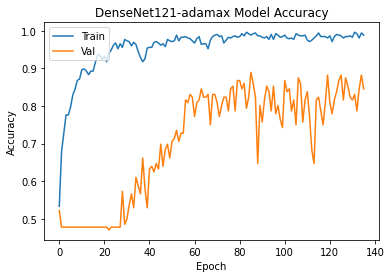

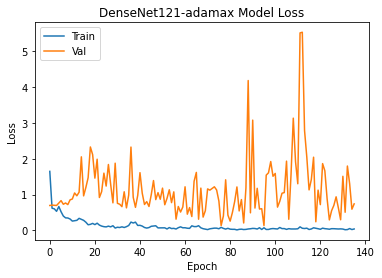

In [0]:
plot_learningCurve(history)

In [0]:
scores = model.evaluate(validation_generator, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

NameError: ignored

In [0]:
save_dir='/content/gdrive/My Drive/168-project-folder/CS168/models'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

model_name='binary-'+MODEL_NAMES[0]
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

In [0]:
drive.flush_and_unmount()